In [1]:
%pylab inline
import pandas as pd
import numpy as np
from scipy import  stats
import statsmodels.api as sm
from statsmodels.graphics.api import qqplot


Populating the interactive namespace from numpy and matplotlib


In [18]:
dta=[10930,10318,10595,10972,7706,6756,9092,10551,9722,10913,11151,8186,6422, 
6337,11649,11652,10310,12043,7937,6476,9662,9570,9981,9331,9449,6773,6304,9355, 
10477,10148,10395,11261,8713,7299,10424,10795,11069,11602,11427,9095,7707,10767, 
12136,12812,12006,12528,10329,7818,11719,11683,12603,11495,13670,11337,10232, 
13261,13230,15535,16837,19598,14823,11622,19391,18177,19994,14723,15694,13248, 
9543,12872,13101,15053,12619,13749,10228,9725,14729,12518,14564,15085,14722, 
11999,9390,13481,14795,15845,15271,14686,11054,10395]
type(dta)

list

In [3]:
dta=pd.Series(dta)
dta.head(5)

0    10930
1    10318
2    10595
3    10972
4     7706
dtype: int64

In [4]:
dta.index = pd.Index(sm.tsa.datetools.dates_from_range('2001','2090'))
dta.head(5)

2001-12-31    10930
2002-12-31    10318
2003-12-31    10595
2004-12-31    10972
2005-12-31     7706
dtype: int64

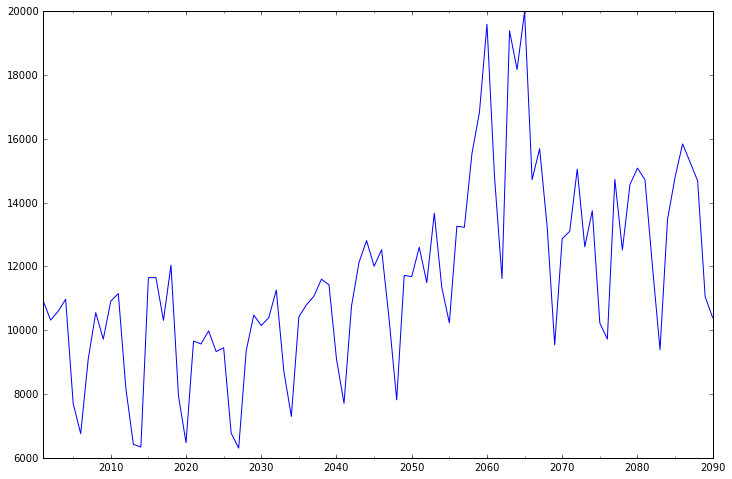

In [5]:
dta.plot(figsize=(12,8))

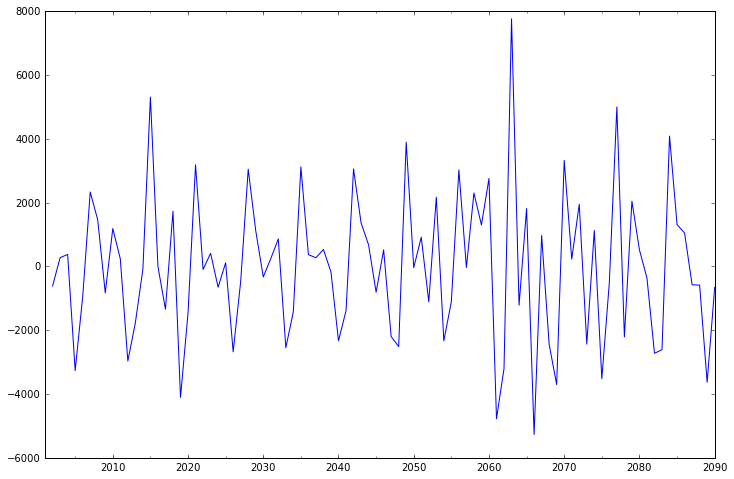

In [6]:
fig = plt.figure(figsize=(12,8))
ax1= fig.add_subplot(111)
diff1 = dta.diff(1)
diff1.plot(ax=ax1)

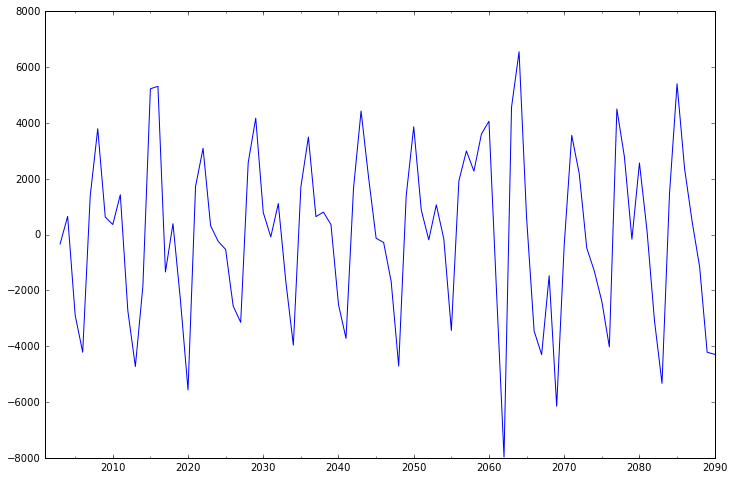

In [7]:
fig = plt.figure(figsize=(12,8))
ax2= fig.add_subplot(111)
diff2 = dta.diff(2)
diff2.plot(ax=ax2)

In [8]:
dta= dta.diff(1)
dta = dta.dropna()
dta.head(2)

2002-12-31   -612.0
2003-12-31    277.0
dtype: float64

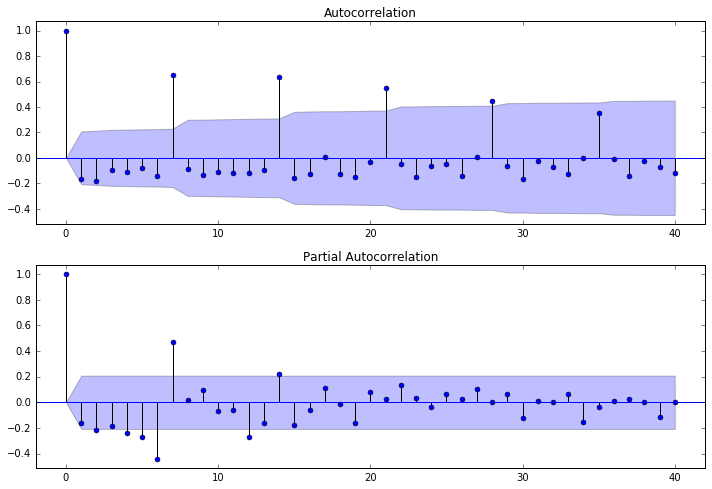

In [9]:

#我们已经知道要使用一阶差分的时间序列，之前判断差分的程序可以注释掉
fig = plt.figure(figsize=(12,8))
ax1=fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dta.values.squeeze(),lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(dta,lags=40,ax=ax2)

In [10]:
arma_mod20 = sm.tsa.ARMA(dta,(7,0)).fit()
print(arma_mod20.aic,arma_mod20.bic,arma_mod20.hqic)
arma_mod30 = sm.tsa.ARMA(dta,(0,1)).fit()
print(arma_mod30.aic,arma_mod30.bic,arma_mod30.hqic)
arma_mod40 = sm.tsa.ARMA(dta,(7,1)).fit()
print(arma_mod40.aic,arma_mod40.bic,arma_mod40.hqic)
arma_mod50 = sm.tsa.ARMA(dta,(8,0)).fit()
print(arma_mod50.aic,arma_mod50.bic,arma_mod50.hqic)

1579.702554920766 1602.10028225 1588.73043605
1632.3203731517624 1639.78628226 1635.32966686
1581.0916055552907 1605.97796925 1591.12258459
1581.3957836097416 1606.28214731 1591.42676265


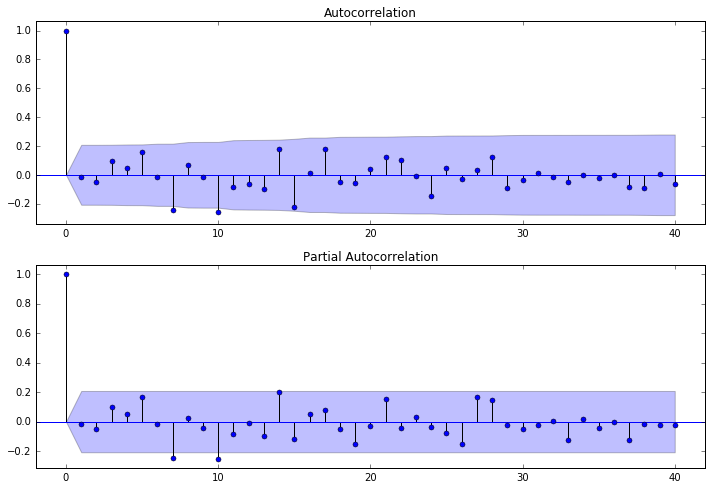

In [11]:
resid = arma_mod20.resid
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(resid.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(resid, lags=40, ax=ax2)

In [12]:
print(sm.stats.durbin_watson(arma_mod20.resid.values))

2.02424824135


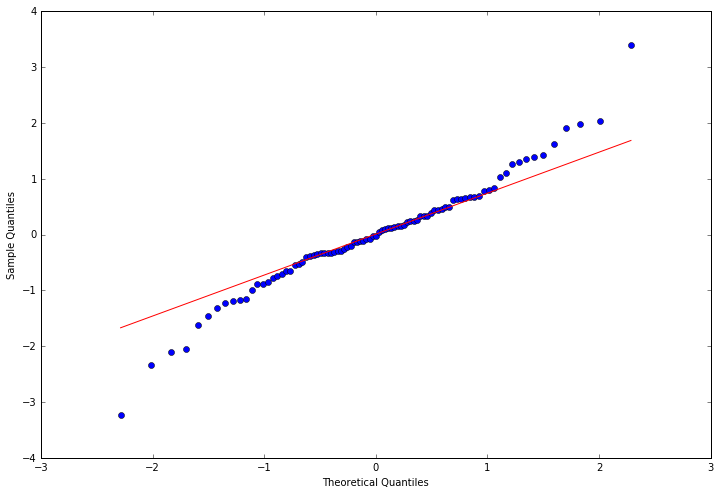

In [13]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
fig = qqplot(resid, line='q', ax=ax, fit=True)

In [14]:
r,q,p = sm.tsa.acf(resid.values.squeeze(), qstat=True)
data = np.c_[range(1,41), r[1:], q, p]
table = pd.DataFrame(data, columns=['lag', "AC", "Q", "Prob(>Q)"])
print(table.set_index('lag'))

            AC          Q  Prob(>Q)
lag                                
1.0  -0.014445   0.019203  0.889786
2.0  -0.047442   0.228725  0.891934
3.0   0.097777   1.129069  0.770062
4.0   0.047513   1.344170  0.853838
5.0   0.156218   3.697126  0.593792
6.0  -0.017856   3.728236  0.713397
7.0  -0.241229   9.475687  0.220283
8.0   0.068079   9.939105  0.269326
9.0  -0.012041   9.953783  0.354240
10.0 -0.256683  16.708381  0.081071
11.0 -0.085178  17.461720  0.094941
12.0 -0.063577  17.886869  0.119169
13.0 -0.096511  18.879463  0.126889
14.0  0.181119  22.421869  0.070352
15.0 -0.223097  27.869218  0.022402
16.0  0.012916  27.887727  0.032610
17.0  0.176768  31.402583  0.017834
18.0 -0.053140  31.724705  0.023695
19.0 -0.057704  32.109961  0.030375
20.0  0.037426  32.274375  0.040461
21.0  0.120520  34.004353  0.036200
22.0  0.102662  35.278385  0.036227
23.0 -0.007829  35.285907  0.048712
24.0 -0.148547  38.035347  0.034385
25.0  0.046254  38.306088  0.043174
26.0 -0.032622  38.442894  0

2090-12-31   -1236.143990
2091-12-31    3548.945958
2092-12-31    1236.638564
2093-12-31     649.913515
2094-12-31    -530.548862
2095-12-31    -611.717242
2096-12-31   -2290.237539
2097-12-31    -726.600046
2098-12-31    2740.786996
2099-12-31     952.949713
2100-12-31     277.178708
Freq: A-DEC, dtype: float64


//anaconda/lib/python3.5/site-packages/statsmodels/base/data.py:503: FutureWarning: TimeSeries is deprecated. Please use Series
  return TimeSeries(result, index=self.predict_dates)


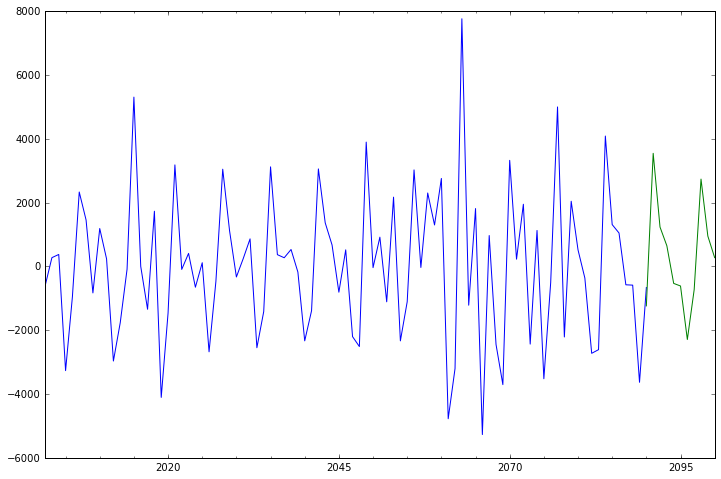

In [15]:
predict_sunspots = arma_mod20.predict('2090', '2100', dynamic=True)
print(predict_sunspots)
fig, ax = plt.subplots(figsize=(12, 8))
ax = dta.ix['2001':].plot(ax=ax)
predict_sunspots.plot(ax=ax)